In [1]:
import os, glob, random
import pandas as pd
import SimpleITK as sitk
import numpy as np

def get_image_path_by_id(patient_id, image_dir):
    image_order  = patient_id
    file_name = [os.path.relpath(os.path.join(image_dir, x)) \
                    for x in os.listdir(image_dir) \
                    if os.path.isfile(os.path.join(image_dir, x)) and patient_id in x][0] 
    return file_name

In [2]:
csv_path = 'MRI_volume_internal_test331.csv'

df = pd.read_csv(csv_path)


print(df.shape)
df.head()

(331, 10)


,Data_set,CT_id,volume1_gd,volume1_ai,volume2_gd,volume2_ai,volume3_gd,volume3_ai,volume4_gd,volume4_ai
0,MRI515,0299_T2,170.11519,172.20813,194.23134,191.95846,166.86214,166.70588,188.93270,189.35886
1,MRI515,0537_T2,201.85218,201.29868,192.23131,193.20245,177.24146,179.00260,207.60860,209.52070
2,MRI515,0450_T1,243.65192,242.78687,96.87088,95.30644,96.70063,96.84787,218.77276,216.18684
3,MRI515,0019_T2,378.97104,373.09953,155.45229,154.73026,143.26801,141.63341,359.64668,356.35743
4,MRI515,0387_T2,175.05756,175.03249,109.21884,109.46109,114.64449,114.17251,178.15256,178.43240


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats

column_str1, column_str2 = 'volume1_gd','volume1_ai'
# column_str1, column_str2 = 'volume2_gd','volume2_ai'
# column_str1, column_str2 = 'volume3_gd','volume3_ai'
# column_str1, column_str2 = 'volume4_gd','volume4_ai'

volume_gd = df[column_str1]
volume_ai = df[column_str2]
if 'internal' in csv_path:
    print( column_str1[:7] +'_________________internal')
else:
    print( column_str1[:7] +'____________external')
    
print( 'manual value, mean ', round (np.mean(volume_gd), 2)  ,'std:' , round (np.std(volume_gd), 2) )
print( 'AI value, mean ', round (np.mean(volume_ai), 2) , 'std:' , round (np.std(volume_ai), 2) )


error = mae(volume_gd, volume_ai) 
error = round(error,2) 
# display 
print("Mean absolute error : " + str(error), '\n\n') 

res = stats.spearmanr(volume_gd,volume_ai)
print(res)
model = linear_model.LinearRegression()
x_new = np.array(volume_gd).reshape(-1, 1)
y_new = np.array(volume_ai).reshape(-1, 1)

model.fit(x_new, y_new )

print("slope w：", model.coef_)
print("interception b：", model.intercept_)



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


volume1_________________internal
manual value, mean  250.81 std: 100.27
AI value, mean  251.48 std: 100.81
Mean absolute error : 3.22 


SignificanceResult(statistic=0.9983977657402475, pvalue=0.0)
slope w： [[1.00437386]]
interception b： [-0.42155018]


(array([32., 86., 86., 42., 29., 26., 12.,  7.,  6.,  5.]),
 array([ 99.82584 , 149.984729, 200.143618, 250.302507, 300.461396,
        350.620285, 400.779174, 450.938063, 501.096952, 551.255841,
        601.41473 ]),
 <BarContainer object of 10 artists>)

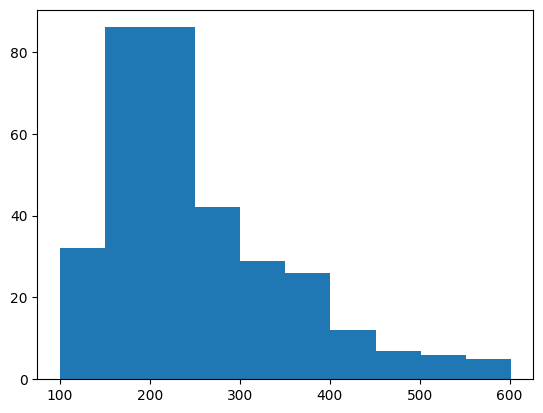

In [4]:
import matplotlib.pyplot as plt

plt.hist(volume_ai)

In [5]:
column_str1, column_str2 = 'volume1_gd','volume1_ai'
# column_str1, column_str2 = 'volume2_gd','volume2_ai'
# column_str1, column_str2 = 'volume3_gd','volume3_ai'
# column_str1, column_str2 = 'volume4_gd','volume4_ai'

[colgd, colai ]  = [column_str1, column_str2]

x_ax = (np.array(df[colgd]) + np.array(df[colai]) ) / 2
y_ax = (np.array(df[colai]) - np.array(df[colgd])) 

std196 = 1.96*np.std((y_ax))

print('Std of difference ',np.std((y_ax)))
print('1.96std of abs difference ',std196)

mean_dif = np.mean((y_ax))
print('Mean of  difference', round(mean_dif,3))
print('Mean +1.96std',  round(mean_dif+ std196,3))
print('Mean -1.96std',  round(mean_dif- std196,3))

outliers = []
for y_value in y_ax:
    if y_value < mean_dif- std196 or y_value > mean_dif + std196:
        outliers.append(y_value)
print('Len(outliers)',len(outliers), 'Len of all test images',len(y_ax),' = %', len(outliers)/ len(y_ax) *100)


if 'internal' in csv_path:
    print( column_str1[:7] +'_________________internal')
else:
    print( column_str1[:7] +'____________external')

Std of difference  4.367540593019247
1.96std of abs difference  8.560379562317724
Mean of  difference 0.675
Mean +1.96std 9.236
Mean -1.96std -7.885
Len(outliers) 18 Len of all test images 331  = % 5.438066465256798
volume1_________________internal


<Figure size 1000x1000 with 0 Axes>

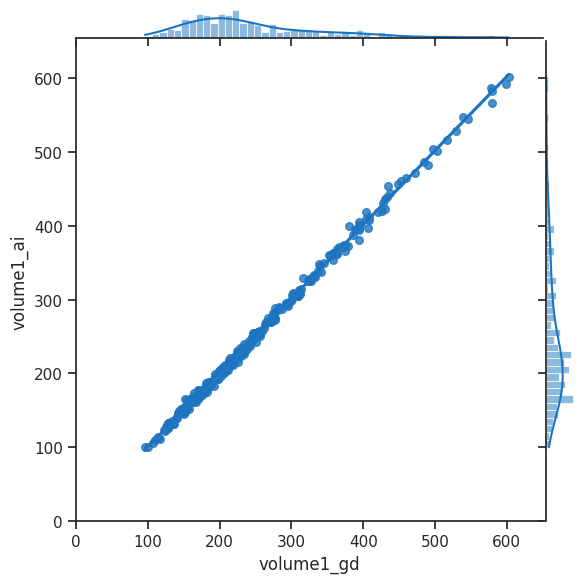

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(10, 10)}) 
sns.set_style("ticks")

sns.despine()

min_lim, max_lim = np.min(df[column_str1]) - 20,  np.max(df[column_str1]) *1.1
min_lim, max_lim = 0,  np.max(df[column_str1]) *1.1

if '1' in column_str1 or '4' in column_str1:
    min_lim, max_lim = 0,  650
else:
    min_y, max_y = 0,  300
    
ax = sns.jointplot(data=df, x=column_str1, y=column_str2 , color = '#1d74c0ff',
              marginal_kws = dict(bins= 50), space = 0.1,ratio = 15
              , xlim=[min_lim, max_lim], ylim=[min_lim, max_lim]
              , kind = 'reg'
              , scatter_kws={'s': 30}
             )
ax.fig.set_size_inches(6,6)

# if 'internal' in csv_path:
#     plt.savefig( 'csv_and_figure/figures_in_png/spearson_slope_' + column_str1[:7] +'_internal.png', dpi = 500)
# else:
#     plt.savefig( 'csv_and_figure/figures_in_png/spearson_slope_' + column_str1[:7] +'_external.png', dpi = 500)

In [7]:
[colgd, colai ]  = [column_str1, column_str2]

x_ax = (np.array(df[colgd]) + np.array(df[colai]) ) / 2
y_ax = (np.array(df[colai]) - np.array(df[colgd])) 

std196 = 1.96*np.std((y_ax))
print('Std of difference ',np.std((y_ax)))
print('1.96std of abs difference ',std196)

mean_dif = np.mean((y_ax))
print('Mean of  difference', mean_dif)
print('Mean +1.96std', mean_dif+ std196)
print('Mean -1.96std', mean_dif- std196)

outliers = []
for y_value in y_ax:
    if y_value < mean_dif- std196 or y_value > mean_dif + std196:
        outliers.append(y_value)
print('Len(outliers)',len(outliers), 'Len of all test images',len(y_ax),' = %', len(outliers)/ len(y_ax) *100)


if 'internal' in csv_path:
    print( column_str1[:7] +'_________________internal')
else:
    print( column_str1[:7] +'____________external')

Std of difference  4.367540593019247
1.96std of abs difference  8.560379562317724
Mean of  difference 0.6754397280966769
Mean +1.96std 9.235819290414401
Mean -1.96std -7.884939834221047
Len(outliers) 18 Len of all test images 331  = % 5.438066465256798
volume1_________________internal


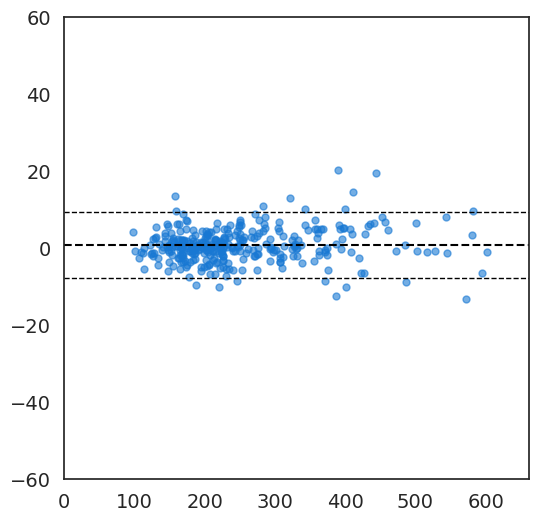

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

min_x, max_x = np.min(x_ax) - 20,  np.max(x_ax) *1.1
min_x, max_x = 0,  np.max(x_ax) *1.1

min_y, max_y = -std196*3, std196*3

if '1' in column_str1 or '4' in column_str1:
    min_y, max_y = -60, 60
else:
    min_y, max_y = -30, 30


ax.plot(x_ax, y_ax, '.', markersize= 10, color='#1878d3ff', alpha = 0.6       )

ax.plot([min_x, max_x], [mean_dif, mean_dif], '--', color='black', linewidth=1.5)
ax.plot([min_x, max_x], [mean_dif+ std196, mean_dif +  std196], '--', color='black', linewidth=1)
ax.plot([min_x, max_x], [mean_dif - std196, mean_dif -  std196], '--', color='black', linewidth= 1)

ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

ax.tick_params(axis='x', which='both', bottom=False, labelbottom=True, labelsize=14)
ax.tick_params(axis='y', which='both', left=False, labelleft=True, labelsize=14)

# if 'internal' in csv_path:
#     plt.savefig( 'csv_and_figure/figures_in_png/bland_altman_' + column_str1[:7] +'_internal.png', dpi = 500)
# else:
#     plt.savefig( 'csv_and_figure/figures_in_png/bland_altman_' + column_str1[:7] +'_external.png', dpi = 500)
    
